## Association Rules Analysis

In [1]:
#!pip install mlxtend

In [2]:
import mlxtend

mlxtend.__version__

'0.23.4'

In [3]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.filterwarnings("ignore")

In [4]:
pd.__version__

'2.2.2'

## Read the dataset

In [5]:
bb_df = pd.read_csv("https://raw.githubusercontent.com/manaranjanp/MLUL2/refs/heads/main/arules/bb.csv")
bb_df.head()

,SKU,Order,Delivery Date,Description
0,6883056,7998299,2014-04-23,Tide_Naturals Detergent Powder Lemon Chandan
1,6883056,6609767,2014-08-22,Tide_Naturals Detergent Powder Lemon Chandan
2,6883056,7963892,2014-05-05,Tide_Naturals Detergent Powder Lemon Chandan
3,6883056,7883032,2014-06-15,Tide_Naturals Detergent Powder Lemon Chandan
4,6883056,6474677,2014-09-25,Tide_Naturals Detergent Powder Lemon Chandan


In [6]:
bb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111968 entries, 0 to 111967
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   SKU            111968 non-null  int64 
 1   Order          111968 non-null  int64 
 2   Delivery Date  111968 non-null  object
 3   Description    111968 non-null  object
dtypes: int64(2), object(2)
memory usage: 3.4+ MB


## Exploring the dataset

How many unique orders and SKUs?

In [7]:
len(bb_df.Order.unique())

25211

In [8]:
len(bb_df.SKU.unique())

4370

In [9]:
sku_desc_dict = dict(zip(bb_df.SKU, bb_df.Description))

## Storing the SKU number and their description in a dictionary

In [10]:
len(sku_desc_dict)

4370

In [11]:
# Print few SKU's and their description
for k, v in random.sample(list(sku_desc_dict.items()), 5):
    print(f"{k}: {v}")

34933429: MAIYAS_Pickle  Garlic
93274726: 24 Mantra_Naturals Dal  Roasted Bengal Gram
92385144: Ambi Pur_Car Air Freshener  Vanilla
34935121: Roasty Tasty_Namkeen  Beej Masoor Mixture
34993723: Metro Ceramics_Mug Set


## Most Sold Items

In [12]:
most_sold_df = bb_df.SKU.value_counts().reset_index()

In [13]:
most_sold_df.columns = ['SKU', 'Count']

In [14]:
items_freq_df = most_sold_df.sort_values("Count",
                                      ascending = False)

In [15]:
items_freq_df['Description'] = items_freq_df.SKU.map(lambda x:sku_desc_dict[x])

In [16]:
items_freq_df[0:10]

,SKU,Count,Description
0,34989061,1204,MILKY MIST_Curd Farm Fresh
1,34995363,1130,Amrutha_Agarbatti Lavender
2,15668520,1060,DAILY BREAD_Bread Brown
3,34934493,1026,Bingo_Yumitos Original Style Salt Sprinkled
4,93100949,800,Parrys_Refined Sugar
5,34936518,743,Fab 360_Fabric Washing Liquid
6,34935354,723,Nexcare_Face Cleaning Pads
7,34988104,712,Rin_Detergent Bar
8,92816234,655,fortune_Refined Oil Rice Bran
9,34988572,591,Britannia _Bourbon The Original Biscuits


In [17]:
items_freq_df[-10:]

,SKU,Count,Description
4328,92997467,2,EVA_Deodorant Body Spray Wild Spicy Surprise
4345,34932159,2,Gustora_Mini Fusilli Durum Wheat Semolina
4350,34994323,2,Amrutha_Agarbatti Sugandh
4347,34993952,2,Bergner_Knife Set
4348,34932337,2,Ravi_Deluxe Long Note Book
4349,34932390,2,Lactocalamine_Sun Shield SPF 30 PA Dry to No...
4351,34932346,2,Linc_Glycer Roller Ball Pen Blue
4367,34996143,1,Prestige_Omega Select Plus Paniyarakkal
4368,34995101,1,The French Factor_Deo Fugo Gold
4369,34934248,1,Eukanuba_Dog Food Adult Large Bread


In [18]:
low_freq_skus = list(items_freq_df[items_freq_df.Count < 3]['SKU'])

In [19]:
len(low_freq_skus)

63

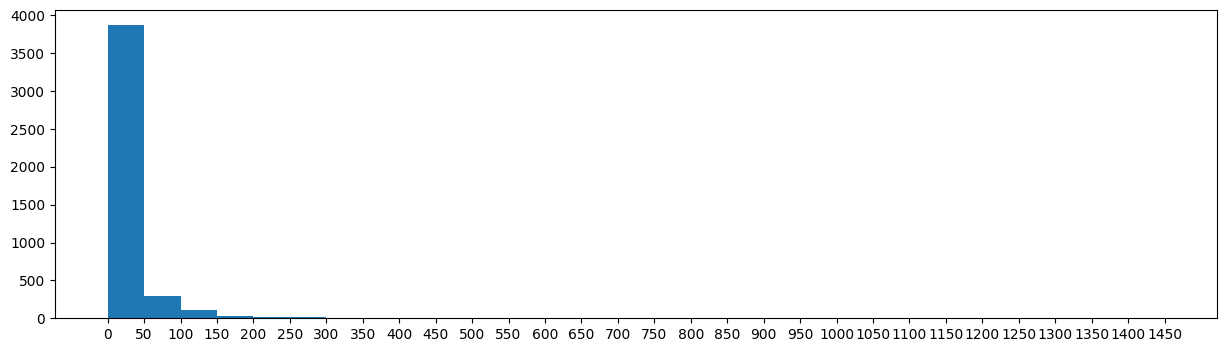

In [20]:
plt.figure(figsize=(15,4))
plt.hist(items_freq_df['Count'], bins = range(0, 1500, 50));
plt.xticks(range(0, 1500, 50));

## Encoding the Baskets


In [21]:
bb_df.drop( 'Description', axis = 1, inplace = True)

In [22]:
bb_df['Quantity'] = 1

In [23]:
bb_df.head()

,SKU,Order,Delivery Date,Quantity
0,6883056,7998299,2014-04-23,1
1,6883056,6609767,2014-08-22,1
2,6883056,7963892,2014-05-05,1
3,6883056,7883032,2014-06-15,1
4,6883056,6474677,2014-09-25,1


In [24]:
bb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111968 entries, 0 to 111967
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   SKU            111968 non-null  int64 
 1   Order          111968 non-null  int64 
 2   Delivery Date  111968 non-null  object
 3   Quantity       111968 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 3.4+ MB


In [25]:
bb_df['Quantity'] = bb_df['Quantity']

In [26]:
bb_pivot_df = bb_df.pivot( index='Order',
                          columns='SKU',
                          values = "Quantity" ).astype('float16').reset_index(drop=True)

In [27]:
bb_pivot_df.head(5)

SKU,6883056,15668519,15668520,15668521,15668541,15668542,15670145,15670146,15670148,15670149,...,93302183,93302184,93302186,93303345,93303349,93316685,93316921,93316922,93320243,108525199
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
bb_pivot_df.fillna( 0, inplace = True )

In [29]:
bb_pivot_df.head(5)

SKU,6883056,15668519,15668520,15668521,15668541,15668542,15670145,15670146,15670148,15670149,...,93302183,93302184,93302186,93303345,93303349,93316685,93316921,93316922,93320243,108525199
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
bb_pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25211 entries, 0 to 25210
Columns: 4370 entries, 6883056 to 108525199
dtypes: float16(4370)
memory usage: 210.1 MB


In [31]:
bb_pivot_df.shape

(25211, 4370)

## Apriori : Finding Itemsets


In [32]:
frequent_itemsets = apriori(bb_pivot_df,
                            min_support=0.002,
                            use_colnames=True,
                            low_memory = True)

In [33]:
frequent_itemsets.tail(10)

,support,itemsets
475,0.002935,(93262111)
476,0.004005,(93262183)
477,0.012733,(93294043)
478,0.004005,(93296778)
479,0.002063,"(15668520, 34934493)"
480,0.002896,"(15668520, 34989061)"
481,0.010511,"(34934493, 34936518)"
482,0.003887,"(34935354, 34936518)"
483,0.003253,"(34988572, 34988575)"
484,0.002142,"(34995363, 34989061)"


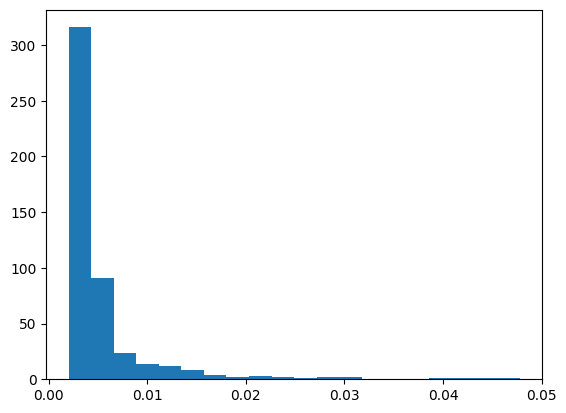

In [34]:
plt.hist(frequent_itemsets.support, bins = 20);

## Finding Association Rules

In [35]:
rules = association_rules(frequent_itemsets,
                          metric="lift",
                          min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(15668520),(34934493),0.042023,0.040680,0.002063,0.049083,1.206560,1.0,0.000353,1.008837,0.178707,0.025578,0.008759,0.049893
1,(34934493),(15668520),0.040680,0.042023,0.002063,0.050703,1.206560,1.0,0.000353,1.009144,0.178457,0.025578,0.009061,0.049893
2,(15668520),(34989061),0.042023,0.047760,0.002896,0.068905,1.442728,1.0,0.000889,1.022709,0.320330,0.033326,0.022205,0.064766
3,(34989061),(15668520),0.047760,0.042023,0.002896,0.060627,1.442728,1.0,0.000889,1.019805,0.322260,0.033326,0.019421,0.064766
4,(34934493),(34936518),0.040680,0.029465,0.010511,0.258390,8.769468,1.0,0.009313,1.308687,0.923537,0.176265,0.235875,0.307566
5,(34936518),(34934493),0.029465,0.040680,0.010511,0.356741,8.769468,1.0,0.009313,1.491344,0.912865,0.176265,0.329464,0.307566
6,(34935354),(34936518),0.028671,0.029465,0.003887,0.135578,4.601366,1.0,0.003042,1.122756,0.805776,0.071655,0.109335,0.133752
7,(34936518),(34935354),0.029465,0.028671,0.003887,0.131927,4.601366,1.0,0.003042,1.118948,0.806435,0.071655,0.106304,0.133752
8,(34988572),(34988575),0.023438,0.020706,0.003253,0.138775,6.702126,1.0,0.002767,1.137095,0.871213,0.079542,0.120566,0.147928
9,(34988575),(34988572),0.020706,0.023438,0.003253,0.157081,6.702126,1.0,0.002767,1.158549,0.868783,0.079542,0.136851,0.147928


In [36]:
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         12 non-null     object 
 1   consequents         12 non-null     object 
 2   antecedent support  12 non-null     float64
 3   consequent support  12 non-null     float64
 4   support             12 non-null     float64
 5   confidence          12 non-null     float64
 6   lift                12 non-null     float64
 7   representativity    12 non-null     float64
 8   leverage            12 non-null     float64
 9   conviction          12 non-null     float64
 10  zhangs_metric       12 non-null     float64
 11  jaccard             12 non-null     float64
 12  certainty           12 non-null     float64
 13  kulczynski          12 non-null     float64
dtypes: float64(12), object(2)
memory usage: 1.4+ KB


## Making sense of the rules

In [37]:
def get_sku_description( skus ):
    all_skus = []
    for sku in skus:
         all_skus.append(sku_desc_dict[sku])
    return ",".join(all_skus)

In [38]:
rules.antecedents[0]

frozenset({15668520})

In [39]:
rules['antecedents_desc'] = rules.antecedents.map(lambda rec: sku_desc_dict[list(rec)[0]])

In [40]:
rules['consequents_desc'] = rules.consequents.map(lambda rec: sku_desc_dict[list(rec)[0]])

In [41]:
rules = rules.sort_values('confidence', ascending=False)

In [42]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedents_desc,consequents_desc
5,(34936518),(34934493),0.029465,0.040680,0.010511,0.356741,8.769468,1.0,0.009313,1.491344,0.912865,0.176265,0.329464,0.307566,Fab 360_Fabric Washing Liquid,Bingo_Yumitos Original Style Salt Sprinkled
4,(34934493),(34936518),0.040680,0.029465,0.010511,0.258390,8.769468,1.0,0.009313,1.308687,0.923537,0.176265,0.235875,0.307566,Bingo_Yumitos Original Style Salt Sprinkled,Fab 360_Fabric Washing Liquid
9,(34988575),(34988572),0.020706,0.023438,0.003253,0.157081,6.702126,1.0,0.002767,1.158549,0.868783,0.079542,0.136851,0.147928,Britannia _5050 Maska Chaska Biscuits,Britannia _Bourbon The Original Biscuits
8,(34988572),(34988575),0.023438,0.020706,0.003253,0.138775,6.702126,1.0,0.002767,1.137095,0.871213,0.079542,0.120566,0.147928,Britannia _Bourbon The Original Biscuits,Britannia _5050 Maska Chaska Biscuits
6,(34935354),(34936518),0.028671,0.029465,0.003887,0.135578,4.601366,1.0,0.003042,1.122756,0.805776,0.071655,0.109335,0.133752,Nexcare_Face Cleaning Pads,Fab 360_Fabric Washing Liquid
7,(34936518),(34935354),0.029465,0.028671,0.003887,0.131927,4.601366,1.0,0.003042,1.118948,0.806435,0.071655,0.106304,0.133752,Fab 360_Fabric Washing Liquid,Nexcare_Face Cleaning Pads
2,(15668520),(34989061),0.042023,0.047760,0.002896,0.068905,1.442728,1.0,0.000889,1.022709,0.320330,0.033326,0.022205,0.064766,DAILY BREAD_Bread Brown,MILKY MIST_Curd Farm Fresh
3,(34989061),(15668520),0.047760,0.042023,0.002896,0.060627,1.442728,1.0,0.000889,1.019805,0.322260,0.033326,0.019421,0.064766,MILKY MIST_Curd Farm Fresh,DAILY BREAD_Bread Brown
1,(34934493),(15668520),0.040680,0.042023,0.002063,0.050703,1.206560,1.0,0.000353,1.009144,0.178457,0.025578,0.009061,0.049893,Bingo_Yumitos Original Style Salt Sprinkled,DAILY BREAD_Bread Brown
0,(15668520),(34934493),0.042023,0.040680,0.002063,0.049083,1.206560,1.0,0.000353,1.008837,0.178707,0.025578,0.008759,0.049893,DAILY BREAD_Bread Brown,Bingo_Yumitos Original Style Salt Sprinkled


In [43]:
rules.to_excel("rules.xlsx", index = False)

In [44]:
top_10_rules = rules.sort_values('confidence', ascending=False)[0:10]

In [45]:
rules_crosstab = pd.crosstab(rules.consequents_desc,
                             rules.antecedents_desc,
                             values = rules.lift,
                             aggfunc = 'max')

In [46]:
rules_crosstab

antecedents_desc,Amrutha_Agarbatti Lavender,Bingo_Yumitos Original Style Salt Sprinkled,Britannia _5050 Maska Chaska Biscuits,Britannia _Bourbon The Original Biscuits,DAILY BREAD_Bread Brown,Fab 360_Fabric Washing Liquid,MILKY MIST_Curd Farm Fresh,Nexcare_Face Cleaning Pads
consequents_desc,,,,,,,,
Amrutha_Agarbatti Lavender,NaN,NaN,NaN,NaN,NaN,NaN,1.001067,NaN
Bingo_Yumitos Original Style Salt Sprinkled,NaN,NaN,NaN,NaN,1.206560,8.769468,NaN,NaN
Britannia _5050 Maska Chaska Biscuits,NaN,NaN,NaN,6.702126,NaN,NaN,NaN,NaN
Britannia _Bourbon The Original Biscuits,NaN,NaN,6.702126,NaN,NaN,NaN,NaN,NaN
DAILY BREAD_Bread Brown,NaN,1.206560,NaN,NaN,NaN,NaN,1.442728,NaN
Fab 360_Fabric Washing Liquid,NaN,8.769468,NaN,NaN,NaN,NaN,NaN,4.601366
MILKY MIST_Curd Farm Fresh,1.001067,NaN,NaN,NaN,1.442728,NaN,NaN,NaN
Nexcare_Face Cleaning Pads,NaN,NaN,NaN,NaN,NaN,4.601366,NaN,NaN


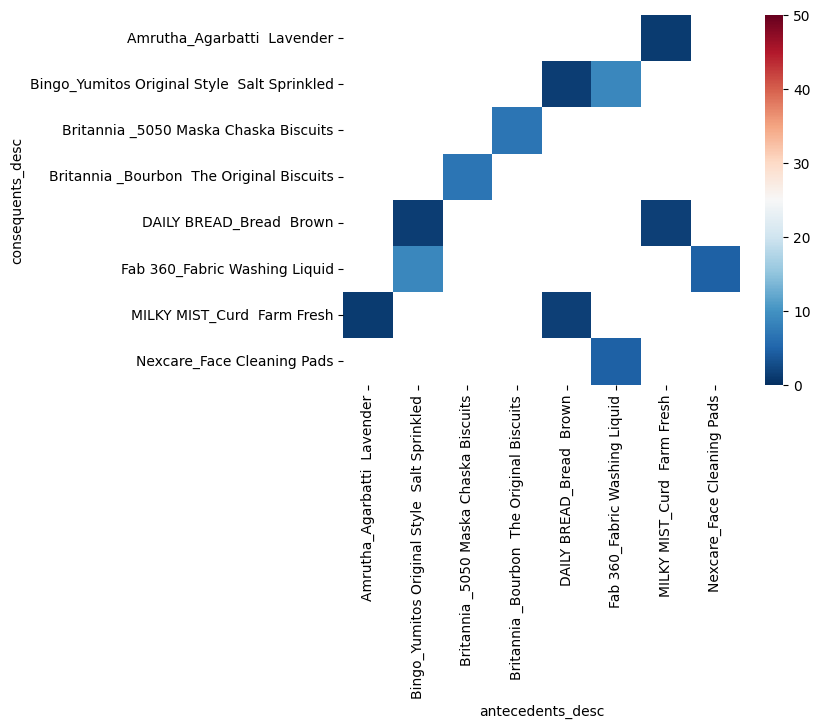

In [47]:
sn.heatmap(rules_crosstab, cmap = 'RdBu_r', vmin=0, vmax=50);